## Copied File for model optimization attempt

## 1.Extract US stock market dataset
#### Include adjusted close prices as daily price indicator, combined with daily trading volume which shows the intensity of trading 
#### Choose ten stocks in each sector initially for cointegration test to find proper pairs


In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
# Choose tech,healthcare and real estate as primary sectors
# For each sector, choose 30 stocks to find cointegrated pairs respectively
sectors = {
    "Technology": ["AAPL", "MSFT", "GOOGL", "NVDA", "META", "TSM", "ORCL", "ADBE", "CSCO", "INTC",
                   "IBM", "SAP", "CRM", "AMD", "TXN", "QCOM", "AVGO", "NOW", "INTU", "SHOP", 
                   "WDAY", "CDNS", "PANW", "SNOW", "SQ", "ZM", "ASML", "MU", "XLNX", "DOCU"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "LLY", "TMO", "UNH", "ABT", "BMY", "CVS",
                   "DHR", "AMGN", "GILD", "BIIB", "ZTS", "BDX", "ISRG", "SYK", "BSX", "CI",
                   "HCA", "REGN", "VRTX", "MDT", "MCK", "ILMN", "RHHBY", "ABC", "COO", "TFX"],
    "Real Estate": ["AMT", "PLD", "CCI", "DLR", "EQIX", "O", "SPG", "WELL", "AVB", "EQR",
                    "EXR", "IRM", "ESS", "BXP", "ARE", "PSA", "VTR", "MAA", "HST", "UDR",
                    "SUI", "CPT", "STOR", "KIM", "SLG", "PEAK", "REG", "SRC", "AIV", "BRX"]
}

# Define date range for the last 5 years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

sector_data = {}

for sector, tickers in sectors.items():
    # Download close price data for each stock in the sector
    data = yf.download(tickers, start=start_date, end=end_date)[['Adj Close','Volume']]
    print(data.shape)
    # Save to dictionary with sector name
    sector_data[sector] = data
    data = data.dropna(axis=1, how='all')
# Display first few rows of each sector's data for verification
for sector, data in sector_data.items():
    print(f"Sector: {sector}")
    print(data.head(), "\n")


[*********************100%%**********************]  30 of 30 completed

1 Failed download:
['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*****                 10%%                      ]  3 of 30 completed

(1258, 60)


[*********************100%%**********************]  30 of 30 completed

1 Failed download:
['ABC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[                       0%%                      ]

(1258, 60)


[*********************100%%**********************]  30 of 30 completed

3 Failed downloads:
['STOR', 'PEAK', 'SRC']: Exception('%ticker%: No timezone found, symbol may be delisted')


(1258, 60)
Sector: Technology
Price       Adj Close                                                \
Ticker           AAPL        ADBE        AMD        ASML       AVGO   
Date                                                                  
2019-11-22  63.447769  299.299988  39.150002  254.482742  27.136101   
2019-11-25  64.560265  305.279999  39.790001  259.195404  27.541092   
2019-11-26  64.056122  307.899994  38.990002  259.501343  27.252428   
2019-11-27  64.916557  309.059998  39.410000  259.510864  27.439411   
2019-11-29  64.773575  309.529999  39.150002  258.688751  27.247257   

Price                                                               ...  \
Ticker           CDNS         CRM       CSCO       DOCU      GOOGL  ...   
Date                                                                ...   
2019-11-22  67.190002  162.090424  38.378704  71.120003  64.523735  ...   
2019-11-25  68.169998  160.995285  38.892136  71.500000  65.120750  ...   
2019-11-26  69.529999  161

## Check if the dates for every stock match

In [2]:
# Check consistency of data length and dates across all stocks in each sector
for sector, data in sector_data.items():
    print(f"Checking sector: {sector}")

    # Separate 'Adj Close' and 'Volume' data and create copies to avoid modification warnings
    adj_close_data = data['Adj Close'].copy()
    volume_data = data['Volume'].copy()
    
    # Extract the list of dates for each Ticker's adjusted close prices
    date_lengths = {Ticker: adj_close_data[Ticker].dropna().shape[0] for Ticker in adj_close_data.columns}
    unique_lengths = set(date_lengths.values())
    
    # Check if all stocks have the same number of data points
    if len(unique_lengths) != 1:
        print("Inconsistent data lengths found.")
        print("Data lengths by Ticker:", date_lengths)
    
    # Verify that dates match across all stocks
    all_dates = adj_close_data.index
    stocks_to_drop = []
    for Ticker in adj_close_data.columns:
        stock_dates = adj_close_data[Ticker].dropna().index
        if not stock_dates.equals(all_dates):
            print(f"Dates do not perfectly match for Ticker and is thus dropped: {Ticker}")
            stocks_to_drop.append(Ticker)
    
    # Drop stocks with inconsistent data from both 'Adj Close' and 'Volume'
    if stocks_to_drop:
        adj_close_data.drop(columns=stocks_to_drop, inplace=True)
        volume_data.drop(columns=stocks_to_drop, inplace=True)
        print(f"Stocks dropped: {stocks_to_drop}")

    # Reassemble the cleaned data
    cleaned_data = pd.concat([adj_close_data, volume_data], axis=1, keys=['Adj Close', 'Volume'])
    
    # Save the modified data back to the sector_data dictionary
    sector_data[sector] = cleaned_data
    print("\n")

Checking sector: Technology
Inconsistent data lengths found.
Data lengths by Ticker: {'AAPL': 1258, 'ADBE': 1258, 'AMD': 1258, 'ASML': 1258, 'AVGO': 1258, 'CDNS': 1258, 'CRM': 1258, 'CSCO': 1258, 'DOCU': 1258, 'GOOGL': 1258, 'IBM': 1258, 'INTC': 1258, 'INTU': 1258, 'META': 1258, 'MSFT': 1258, 'MU': 1258, 'NOW': 1258, 'NVDA': 1258, 'ORCL': 1258, 'PANW': 1258, 'QCOM': 1258, 'SAP': 1258, 'SHOP': 1258, 'SNOW': 1054, 'SQ': 1258, 'TSM': 1258, 'TXN': 1258, 'WDAY': 1258, 'XLNX': 0, 'ZM': 1258}
Dates do not perfectly match for Ticker and is thus dropped: SNOW
Dates do not perfectly match for Ticker and is thus dropped: XLNX
Stocks dropped: ['SNOW', 'XLNX']


Checking sector: Healthcare
Inconsistent data lengths found.
Data lengths by Ticker: {'ABBV': 1258, 'ABC': 0, 'ABT': 1258, 'AMGN': 1258, 'BDX': 1258, 'BIIB': 1258, 'BMY': 1258, 'BSX': 1258, 'CI': 1258, 'COO': 1258, 'CVS': 1258, 'DHR': 1258, 'GILD': 1258, 'HCA': 1258, 'ILMN': 1258, 'ISRG': 1258, 'JNJ': 1258, 'LLY': 1258, 'MCK': 1258, 'MDT': 

In [3]:
# Check if the data length(dates) for each sector after cleaning is consistent, respectively
for sector, data in sector_data.items():
    date_lengths = {Ticker: data['Adj Close'][Ticker].dropna().shape[0] for Ticker in data['Adj Close'].columns}
    unique_lengths = set(date_lengths.values())
    if len(unique_lengths) != 1:
        print(f"Data lengths are inconsistent for sector: {sector}")
        print("Data lengths by Ticker:", date_lengths)
    else:
        print(f"Data lengths are consistent for sector: {sector}")

Data lengths are consistent for sector: Technology
Data lengths are consistent for sector: Healthcare
Data lengths are consistent for sector: Real Estate


## 2.Preprocess the dataset, including drop null values and standardization
#### The absolute value of changes in stock prices may not reflect the true relative moving between stocks. For instance, the relative motion of a 1 dollar stock and 10 dollar stock can hardly be explicated by absolute prices, but rather by standardized prices.

In [4]:
from sklearn.preprocessing import StandardScaler

# Process each sector's data
for sector, data in sector_data.items():
    
    # Step 1: Drop any rows with null values (ensure data consistency across stocks)
    data = data.dropna()
    
    # Step 2: Save original 'Adj Close' prices
    raw_close_prices = data['Adj Close'].copy()
    
    # Step 3: Standardize 'Adj Close' prices
    scaler = StandardScaler()
    standardized_close = pd.DataFrame(
        scaler.fit_transform(raw_close_prices), 
        index=raw_close_prices.index, 
        columns=raw_close_prices.columns
    )
    
    # Combine original and standardized close prices with volume data
    sector_data[sector] = pd.concat(
        {'Adj Close': raw_close_prices, 'Standardized Close': standardized_close, 'Volume': data['Volume']},
        axis=1
    )

print("Data processing complete.")



Data processing complete.


## 3. Cointegration Test

#### Rationale: Cointegration refers to a statistical relationship where two or more time series move together over the long term, ideal for pairs trading because their prices tend to revert to a stable spread.
#### Two major methods to choose from:
#### (1) Engle-Granger Method:  This efficient test is used to initially screen pairs by checking for cointegration between two time series. It involves a regression between the two series and tests the residuals for stationarity, providing a quick way to filter out potential pairs from a larger dataset
#### (2) Johansen's Method: Johansen accounts for endogeneity, where both stocks might influence each other, making it more reliable. This validation step ensures only pairs with a stable, long-term relationship are selected for trading
#### With such advantages combined, we can firstly implement Engle-Granger Method and then validate the results using Johansen's Method


#### Note: For predetermined cointegrated pairs by Engle-Granger method, we use OLS(Ordinary Least Square) method to find the hedge ratio between two stocks, in order to preprocess the inputs for Deep Q-Networks model
#### The example spread formula after OLS is: Spread(Standardized): Stock_A - hegde ratio(determined by Johansen's Method) * Stock_B 

Engle-Granger Cointegrated Pair: AMT, ARE, p-value: 0.0111, t-statistic: -3.8652
Engle-Granger Cointegrated Pair: AMT, BXP, p-value: 0.0174, t-statistic: -3.7181
Johansen Validated Pair: AMT and BXP, Trace Statistic: 18.539681420078264
Hedge Ratio: 1.0060


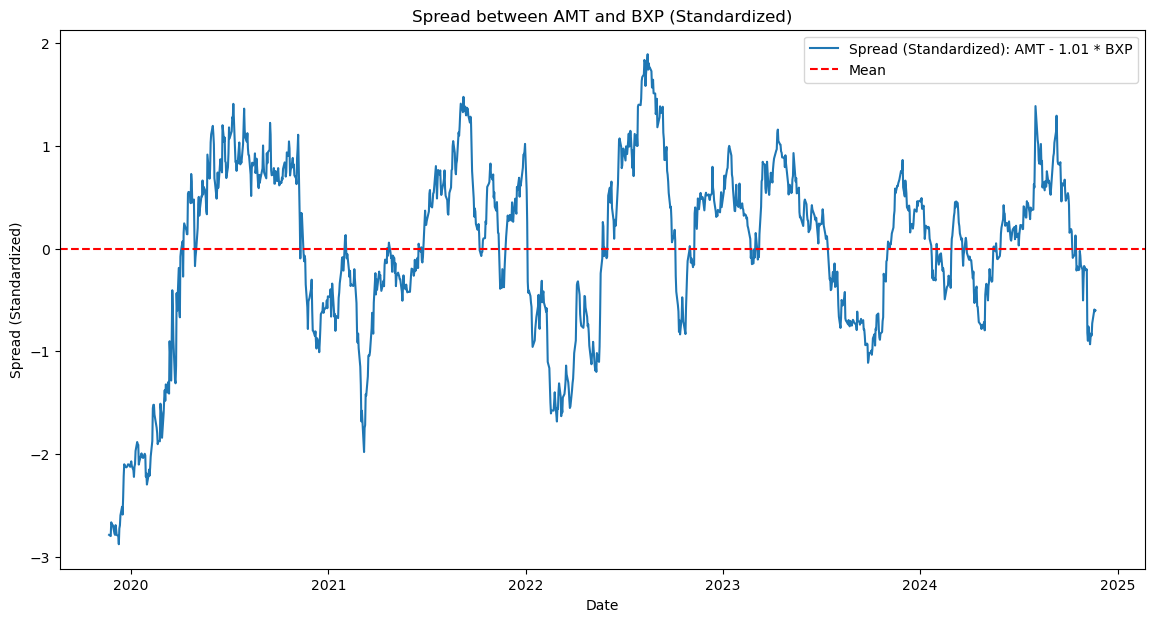

Engle-Granger Cointegrated Pair: EQIX, WELL, p-value: 0.0147, t-statistic: -3.7745
Engle-Granger Cointegrated Pair: KIM, PSA, p-value: 0.0063, t-statistic: -4.0419
Johansen Validated Pair: KIM and PSA, Trace Statistic: 21.39123659141952
Hedge Ratio: 0.0770


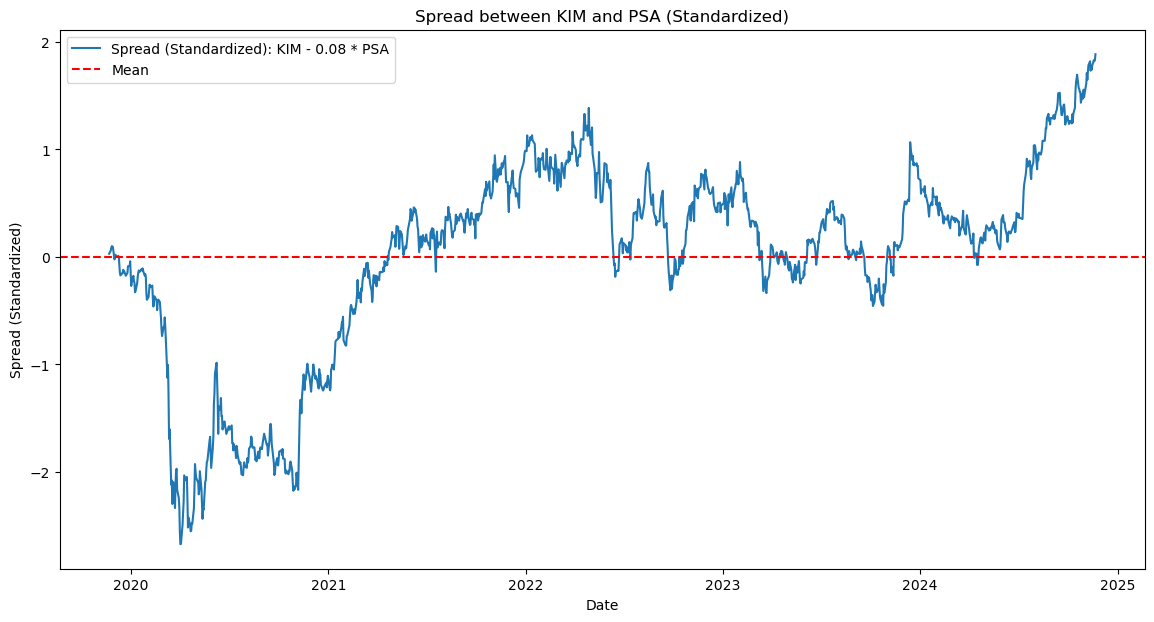

Engle-Granger Cointegrated Pair: O, PSA, p-value: 0.0009, t-statistic: -4.5756
Johansen Validated Pair: O and PSA, Trace Statistic: 25.30654962566681
Hedge Ratio: 0.1245


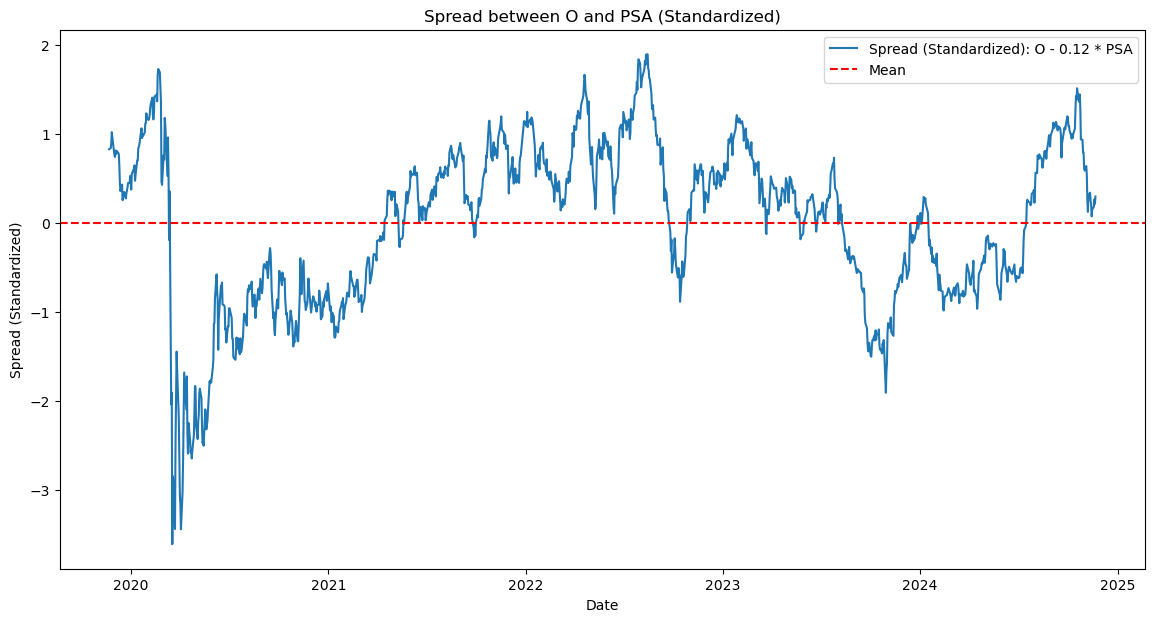

Engle-Granger Cointegrated Pair: O, UDR, p-value: 0.0198, t-statistic: -3.6730
Engle-Granger Cointegrated Pair: PSA, REG, p-value: 0.0094, t-statistic: -3.9163
Johansen Validated Pair: PSA and REG, Trace Statistic: 20.41978739061398
Hedge Ratio: 5.9161


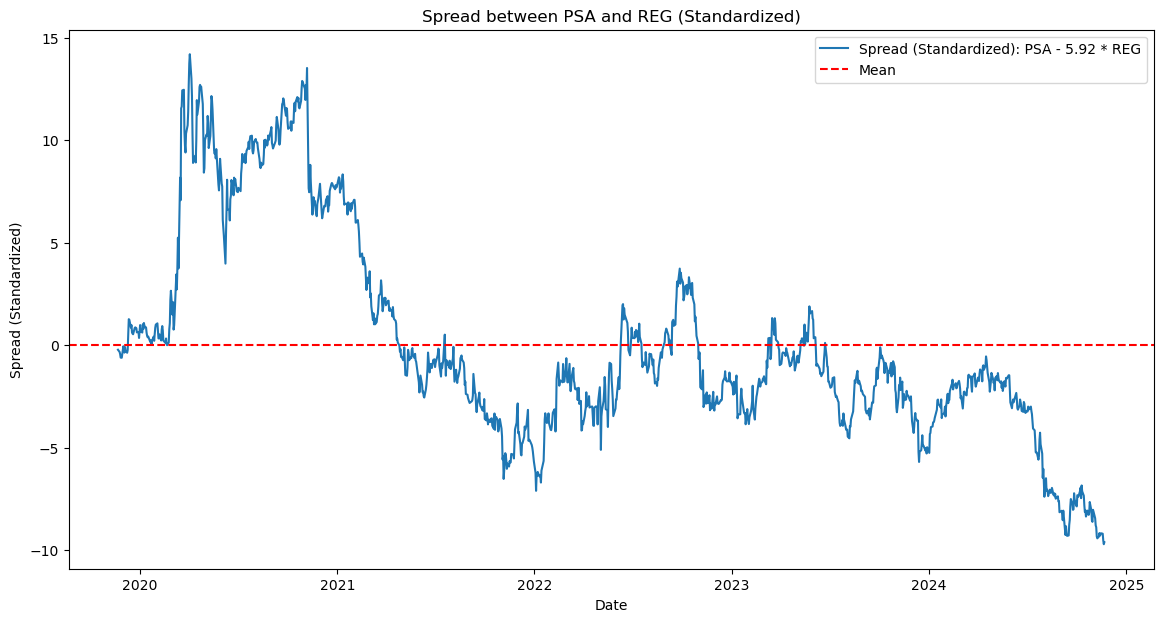

Total validated cointegrated pairs found: 4
Validated Pairs: [('AMT', 'BXP'), ('KIM', 'PSA'), ('O', 'PSA'), ('PSA', 'REG')]


In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Set the sector and extract the adjusted and standardized close prices
sector = "Real Estate"  # Example sector, can be any sector in sector_data
close_prices = sector_data[sector]['Adj Close']  # Raw close prices
standardized_close = sector_data[sector]['Standardized Close']  # Standardized close prices

# List to store validated cointegrated pairs along with their price data and standardized spread
validated_pairs_data = []

# Perform Engle-Granger test on each unique pair of stocks in the sector
tickers = close_prices.columns
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        stock_a = tickers[i]
        stock_b = tickers[j]
        
        # Step 1: Engle-Granger Cointegration Test
        t_statistic, p_value, _ = sm.tsa.coint(close_prices[stock_a], close_prices[stock_b])
        
        # Check if the pair passes the Engle-Granger test
        if p_value < 0.02 and t_statistic < -3.5:
            print(f"Engle-Granger Cointegrated Pair: {stock_a}, {stock_b}, p-value: {p_value:.4f}, t-statistic: {t_statistic:.4f}")
            
            # Step 2: Johansen Test for Validation and Hedge Ratio Derivation
            johansen_test = coint_johansen(close_prices[[stock_a, stock_b]], det_order=1, k_ar_diff=1)

            # Check if Johansen test confirms cointegration at the 5% level
            if johansen_test.lr1[0] > johansen_test.cvt[0, 1]:
                print(f"Johansen Validated Pair: {stock_a} and {stock_b}, Trace Statistic: {johansen_test.lr1[0]}")
                
                # Use the first eigenvector as the hedge ratio
                hedge_ratio = -johansen_test.evec[:, 0][1] / johansen_test.evec[:, 0][0]  # Normalize if necessary
                
                # Calculate the standardized spread using Johansen-derived hedge ratio
                spread_standardized = standardized_close[stock_a] - hedge_ratio * standardized_close[stock_b]
                
                validated_pairs_data.append({
                    'pair': (stock_a, stock_b),
                    'prices': close_prices[[stock_a, stock_b]],
                    'spread_standardized': spread_standardized
                })
                print(f"Hedge Ratio: {hedge_ratio:.4f}")
                # Plotting as before
                plt.figure(figsize=(14, 7))
                plt.plot(spread_standardized, label=f"Spread (Standardized): {stock_a} - {hedge_ratio:.2f} * {stock_b}")
                plt.axhline(spread_standardized.mean(), color='red', linestyle='--', label='Mean')
                plt.title(f"Spread between {stock_a} and {stock_b} (Standardized)")
                plt.xlabel("Date")
                plt.ylabel("Spread (Standardized)")
                plt.legend()
                plt.show()

print(f"Total validated cointegrated pairs found: {len(validated_pairs_data)}")
print("Validated Pairs:", [pair['pair'] for pair in validated_pairs_data])

#### Now the cointegrated pairs are determined, we can start constructing the Deep Q-Networks(DQN) model

## Improve the model by not explicitly defining boundaries. Rather, let the agent learn to execute strategies with optimized boundaries

In [6]:
# Step 1: Define the DQN Network for Trading Actions
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt


class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),  # Increased size for more expressive power
            nn.ReLU(),
            nn.Linear(64, 128),  # Additional hidden layer
            nn.ReLU(),
            nn.Linear(128, 128),   # Additional hidden layer for deeper learning
            nn.ReLU(),
            nn.Linear(128, action_dim)  # Output layer for action values
        )

    def forward(self, state):
        return self.fc(state)
    


In [7]:
import gym
from gym import spaces
import numpy as np

class PairsTradingEnv(gym.Env):
    def __init__(self, spread_data, prices_data):
        super(PairsTradingEnv, self).__init__()

        # Define boundary settings
        self.boundary_settings = [
            {'trade': 0.5, 'stop_loss': 2},
            {'trade': 1.0, 'stop_loss': 3.0},
            {'trade': 1.5, 'stop_loss': 3.5},
            {'trade': 2.0, 'stop_loss': 4.0},
            {'trade': 2.5, 'stop_loss': 4.5},
            {'trade': 3.0, 'stop_loss': 5.0},
        ]

        # Define action space: selecting from pre-defined boundary settings
        self.boundary_action_space = spaces.Discrete(len(self.boundary_settings))

        # Observation space: [current spread, moving average of spread, position, trade_boundary, stop_loss_boundary]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)

        # Custom environment parameters
        self.spread_data = spread_data
        self.prices_data = prices_data  # Dictionary with 'stock_A' and 'stock_B' price columns
        self.current_step = 0
        self.position = 0  # No position initially
        self.entry_price_A = None
        self.entry_price_B = None
        self.volume_A = 0
        self.volume_B = 0
        self.trade_boundary = 0  # Initialize trade boundary
        self.stop_loss_boundary = 0  # Initialize stop-loss boundary
        self.entry_step = None  # Initialize entry step

    def set_boundaries(self, action):
        """Set trade and stop-loss boundaries based on the chosen action."""
        boundaries = self.boundary_settings[action]
        self.trade_boundary = boundaries['trade']
        self.stop_loss_boundary = boundaries['stop_loss']

    def reset(self):
        # Reset the environment to an initial state and return the initial observation
        self.current_step = 0
        self.position = 0
        self.entry_price_A = None
        self.entry_price_B = None
        self.volume_A = 0
        self.volume_B = 0
        self.trade_boundary = 0  # Reset trade boundary
        self.stop_loss_boundary = 0  # Reset stop-loss boundary
        self.entry_step = None  # Reset entry step
        initial_spread = self.spread_data[self.current_step]
        initial_mean_spread = np.mean(self.spread_data[:5])

        # Return state with 5 elements to match the observation space
        return np.array([initial_spread, initial_mean_spread, self.position, self.trade_boundary, self.stop_loss_boundary], dtype=np.float32)

    def step(self, action):
        """Step function with automated position setting based on boundaries."""
        # Set the boundaries based on the action
        self.set_boundaries(action)

        # Prices at the current step
        current_price_A = self.prices_data['stock_A'][self.current_step]
        current_price_B = self.prices_data['stock_B'][self.current_step]
        spread = self.spread_data[self.current_step]
        reward = 0  # Initialize reward

        # Check if a position needs to be set
        if self.position == 0:
            # Open long position if spread >= trade boundary
            if spread >= self.trade_boundary:
                self.position = 1
                self.entry_price_A = current_price_A
                self.entry_price_B = current_price_B
                self.volume_A = 1  # Fixed volume of stock A
                self.volume_B = (self.volume_A * self.entry_price_A) / self.entry_price_B
                self.entry_step = self.current_step

            # Open short position if spread <= -trade boundary
            elif spread <= -self.trade_boundary:
                self.position = -1
                self.entry_price_A = current_price_A
                self.entry_price_B = current_price_B
                self.volume_A = 1  # Fixed volume of stock A
                self.volume_B = (self.volume_A * self.entry_price_A) / self.entry_price_B
                self.entry_step = self.current_step

        # Check if we should close the position under normal conditions (take-profit)
        elif self.position == 1 and spread <= 0:
            # Close long position with profit
            reward = self._calculate_reward(
                self.entry_price_A, self.entry_price_B,
                current_price_A, current_price_B,
                self.volume_A, self.volume_B,
                self.position, action='normal_close'
            )
            self.position = 0
            self.entry_price_A = self.entry_price_B = None
            self.volume_A = self.volume_B = 0
            self.entry_step = None

        elif self.position == -1 and spread >= 0:
            # Close short position with profit
            reward = self._calculate_reward(
                self.entry_price_A, self.entry_price_B,
                current_price_A, current_price_B,
                self.volume_A, self.volume_B,
                self.position, action='normal_close'
            )
            self.position = 0
            self.entry_price_A = self.entry_price_B = None
            self.volume_A = self.volume_B = 0
            self.entry_step = None

        # Handle stop-loss condition if a position is open
        elif self.position == 1 and spread >= self.stop_loss_boundary:
            reward = self._calculate_reward(
                self.entry_price_A, self.entry_price_B,
                current_price_A, current_price_B,
                self.volume_A, self.volume_B,
                self.position, action='stop_loss'
            )
            self.position = 0
            self.entry_price_A = self.entry_price_B = None
            self.volume_A = self.volume_B = 0
            self.entry_step = None

        elif self.position == -1 and spread <= -self.stop_loss_boundary:
            reward = self._calculate_reward(
                self.entry_price_A, self.entry_price_B,
                current_price_A, current_price_B,
                self.volume_A, self.volume_B,
                self.position, action='stop_loss'
            )
            self.position = 0
            self.entry_price_A = self.entry_price_B = None
            self.volume_A = self.volume_B = 0
            self.entry_step = None

        # Move to the next time step
        self.current_step += 1
        done = self.current_step >= len(self.prices_data['stock_A']) - 1

        # Forced exit at the end of the trading period
        if done and self.position != 0:
            reward = self._calculate_reward(
                self.entry_price_A, self.entry_price_B,
                current_price_A, current_price_B,
                self.volume_A, self.volume_B,
                self.position, action='exit'
            )
            self.position = 0
            self.entry_price_A = self.entry_price_B = None
            self.volume_A = self.volume_B = 0
            self.entry_step = None

        # Create the next state
        if not done:
            next_spread = self.spread_data[self.current_step]
            mean_spread = np.mean(self.spread_data[max(0, self.current_step - 5):self.current_step + 1])
        else:
            next_spread = 0
            mean_spread = 0

        next_state = [
            next_spread,
            mean_spread,
            self.position,
            self.trade_boundary,
            self.stop_loss_boundary
        ]

        return np.array(next_state, dtype=np.float32), reward, done, {}

    def _calculate_reward(self, entry_price_A, entry_price_B, current_price_A, current_price_B, volume_A, volume_B, position, action):
        # Ensure entry prices are not None when calculating reward
        assert entry_price_A is not None and entry_price_B is not None, "Entry prices should not be None when calculating reward."

        # Reward calculation based on position and exit condition
        if position == 1:  # Long position
            W_t = (
                volume_A * ((current_price_A - entry_price_A) / entry_price_A) +
                volume_B * ((entry_price_B - current_price_B) / entry_price_B)
            )
        elif position == -1:  # Short position
            W_t = (
                volume_A * ((entry_price_A - current_price_A) / entry_price_A) +
                volume_B * ((current_price_B - entry_price_B) / entry_price_B)
            )
        else:
            W_t = 0

        if action == 'normal_close':
            return 1000 * W_t  # Adjusted multiplier for normal close
        elif action == 'stop_loss':
            return -1400 * abs(W_t)  # Adjusted penalty for stop-loss
        elif action == 'exit':
            return -500 * abs(W_t)  # Adjusted penalty for forced exit
        return 0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random

def train_dqn(env, num_episodes, batch_size, gamma, epsilon, epsilon_min, epsilon_decay, lr, target_update_freq):
    # Initialize the online and target networks for trading decisions
    state_dim = env.observation_space.shape[0]  # Should be 5 in this case
    boundary_action_dim = env.boundary_action_space.n

    # Define the DQN and target networks
    trading_net = DQN(state_dim, boundary_action_dim)
    target_trading_net = DQN(state_dim, boundary_action_dim)
    target_trading_net.load_state_dict(trading_net.state_dict())

    # Optimizer
    optimizer_trading = optim.Adam(trading_net.parameters(), lr=lr)

    # Experience replay buffer
    replay_buffer = deque(maxlen=10000)
    avg_q_values_per_episode = []
    step_count = 0
    episode_total_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        episode_q_values = []

        while not done:
            # Epsilon-greedy action selection for boundary settings
            if random.random() < epsilon:
                boundary_action = env.boundary_action_space.sample()  # Explore boundary settings
            else:
                with torch.no_grad():
                    boundary_q_values = trading_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0))
                    boundary_action = torch.argmax(boundary_q_values).item()  # Exploit
                    episode_q_values.append(boundary_q_values.max().item())

            # Step through the environment with the selected boundary settings and observe the result
            next_state, reward, done, _ = env.step(boundary_action)
            total_reward += reward

            # Store transition in replay buffer
            replay_buffer.append((state, boundary_action, reward, next_state, done))
            state = next_state

            # Train the trading network with replay buffer
            if len(replay_buffer) >= batch_size:
                minibatch = random.sample(replay_buffer, batch_size)
                states, actions, rewards, next_states, dones = zip(*minibatch)

                states = torch.tensor(np.array(states), dtype=torch.float32)
                actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
                rewards = torch.tensor(rewards, dtype=torch.float32)
                next_states = torch.tensor(np.array(next_states), dtype=torch.float32)
                dones = torch.tensor(dones, dtype=torch.float32)

                # Compute Q-values and targets for trading network
                q_values = trading_net(states).gather(1, actions)
                with torch.no_grad():
                    max_next_q_values = target_trading_net(next_states).max(1)[0]
                    target_q_values = rewards + (1 - dones) * gamma * max_next_q_values

                # Optimize trading network
                loss = nn.functional.mse_loss(q_values, target_q_values.unsqueeze(1))
                optimizer_trading.zero_grad()
                loss.backward()
                optimizer_trading.step()

            # Update target network periodically
            if step_count % target_update_freq == 0:
                target_trading_net.load_state_dict(trading_net.state_dict())
            step_count += 1

        # Append the total reward of the current episode
        episode_total_rewards.append(total_reward)

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

        # Track average Q-values over episodes
        avg_q_value_episode = np.mean(episode_q_values) if episode_q_values else 0
        avg_q_values_per_episode.append(avg_q_value_episode)

        # Optional: Print some debug information
        if episode % 10 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

    # Plot the average Q-values per episode
    plt.figure()
    plt.plot(avg_q_values_per_episode)
    plt.xlabel("Episode")
    plt.ylabel("Average Q-Value")
    plt.title("Average Q-Value per Episode")
    plt.show()

    # Plot the total rewards per episode
    plt.figure()
    plt.plot(episode_total_rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()



Selected Pair: ('KIM', 'PSA')
Episode 0, Total Reward: -2899.204670678833, Epsilon: 0.9950
Episode 10, Total Reward: -2027.1356645133665, Epsilon: 0.9464
Episode 20, Total Reward: -2336.0215833544994, Epsilon: 0.9001
Episode 30, Total Reward: -1707.0967422432268, Epsilon: 0.8561
Episode 40, Total Reward: -2323.3749582925316, Epsilon: 0.8142
Episode 50, Total Reward: -2246.5735162571805, Epsilon: 0.7744
Episode 60, Total Reward: -2047.401524072094, Epsilon: 0.7366
Episode 70, Total Reward: -2229.0457184821826, Epsilon: 0.7005
Episode 80, Total Reward: -1290.694374651232, Epsilon: 0.6663
Episode 90, Total Reward: -1960.4620380155955, Epsilon: 0.6337


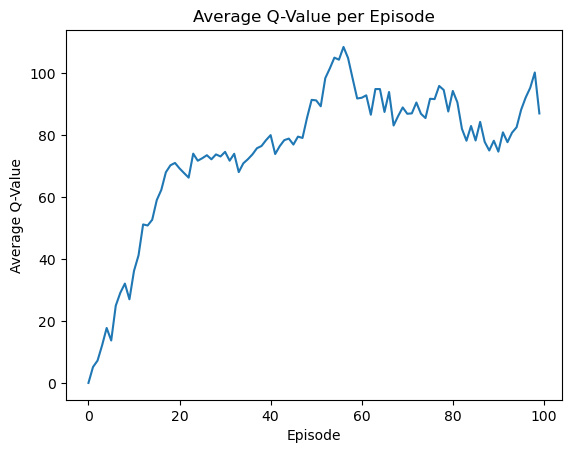

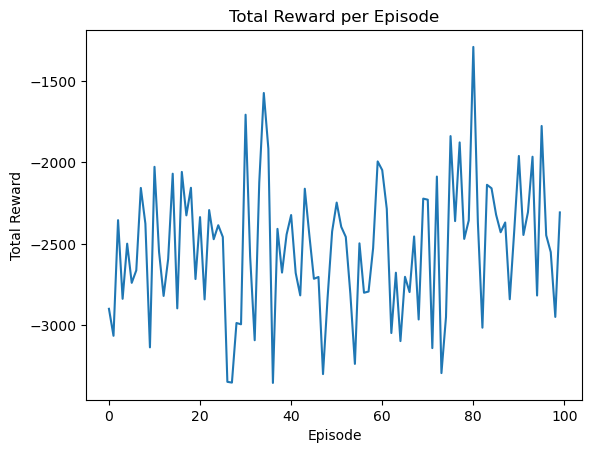

In [9]:
# define a function to realize the split and train the model above
def train_environment(pair_data):
    # Print the selected pair
    print("Selected Pair:", pair_data['pair'])
    # Extract the stock tickers
    stock_a, stock_b = pair_data['pair']
    # Prepare the spread and prices data with standardized keys
    spread_data = pair_data['spread_standardized']
    prices_data = {
        stock_a: pair_data['prices'][stock_a],
        stock_b: pair_data['prices'][stock_b]
    }
    # Split the data into training (75%) and test (25%) sets
    split_index = int(len(spread_data) * 0.75)
    train_spread = spread_data[:split_index]
    test_spread = spread_data[split_index:]
    train_prices = {
        'stock_A': prices_data[stock_a][:split_index],
        'stock_B': prices_data[stock_b][:split_index]
    }
    test_prices = {
        'stock_A': prices_data[stock_a][split_index:],
        'stock_B': prices_data[stock_b][split_index:]
    }
    # Train the model on the training set
    train_env = PairsTradingEnv(
        spread_data=train_spread,
        prices_data=train_prices,
    )
    return train_env

# Train the DQN agent
train_dqn(
    env=train_environment(validated_pairs_data[1]),
    num_episodes=100,
    batch_size=64,
    gamma=0.99,
    epsilon= 1,
    epsilon_min=0.01,
    epsilon_decay=0.995,
    lr=0.01,
    target_update_freq=200,
)
